<a href="https://colab.research.google.com/github/harishsahadev/PDSA/blob/main/PDSA_LectureCodes_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# L 4.2

In [ ]:
edges = [(0,1), (0,4), (1,2), (2,0), (3,4), (3,6), (4,0), (4,3), (4,7), (5,3), (5,7), (6,5), (7,4), (7,8), (8,5), (8,9), (9,8)]

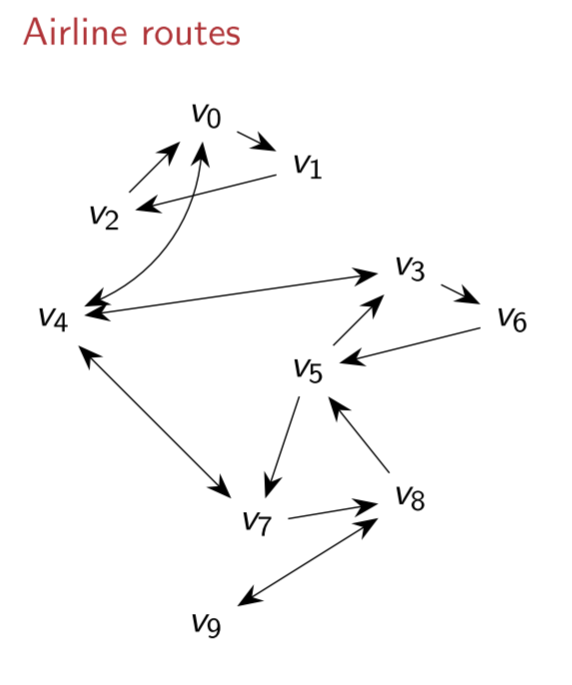

In [ ]:
edges = [(0,1), (0,2), (0,4), (1,2), (4,3), (4,7), (3,5), (3,6), (5,6), (5,8), (5,7), (7,8), (8,9),
         (1,0), (2,0), (4,0), (2,1), (3,4), (7,4), (5,3), (6,3), (6,5), (8,5), (7,5), (8,7), (9,8)]

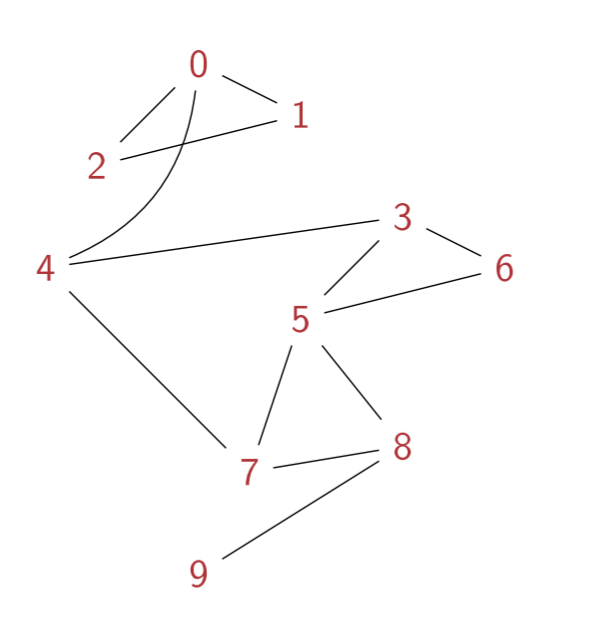

## Adjacency Matrix

In [ ]:
# Adjacency Matrix
import numpy as np 
AMat = np.zeros(shape=(10, 10))

for (i, j) in edges:
  AMat[i, j] = 1

print(AMat)

[[0. 1. 1. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


### Checking neighbours of Adj. Matrix

In [ ]:
def neighbours(AMat, i):
  nbrs = []
  (rows, cols) = AMat.shape
  for j in range(cols):
    if AMat[i, j] == 1:
      nbrs.append(j)
  return nbrs

In [ ]:
# Checking neighbours
neighbours(AMat, 7)

[4, 5, 8]

## Adjacency List

In [ ]:
# Adjacency List
AList = {}
for i in range(10):
  AList[i] = []
for (i, j) in edges:
  AList[i].append(j)

print(AList)

{0: [1, 2, 4], 1: [2, 0], 2: [0, 1], 3: [5, 6, 4], 4: [3, 7, 0], 5: [6, 8, 7, 3], 6: [3, 5], 7: [8, 4, 5], 8: [9, 5, 7], 9: [8]}


# L 4.3

## Breadth First Search (BFS)

### Queue Implementation

In [ ]:
class Queue:
  def __init__(self):
    self.queue = []
  
  def addq(self, v):
    self.queue.append(v)

  def delq(self):
    v = None
    if not self.isempty():
      v = self.queue[0]
      self.queue = self.queue[1:]
    return v

  def isempty(self):
    return (self.queue == [])

  def __str__(self):
    return str(self.queue)

In [ ]:
# Checking working of queue
q = Queue()

for i in range(3):
  q.addq(i)
  print(q)
print(q.isempty())

for i in range(3):
  print(q.delq(), q)
print(q.isempty())

[0]
[0, 1]
[0, 1, 2]
False
0 [1, 2]
1 [2]
2 []
True


### BFS using Adj. Matrix

In [ ]:
def BFS(AMat, v):
  (rows, cols) = AMat.shape

  visited = {}
  for i in range(rows):
    visited[i] = False
  q = Queue()

  visited[v] = True
  q.addq(v)

  while(not q.isempty()):
    j = q.delq()
    for k in neighbours(AMat, j):
      if (not visited[k]):
        visited[k] = True
        q.addq(k)

  return visited

In [ ]:
# Checking BFS
BFS(AMat, 7)

{0: True,
 1: True,
 2: True,
 3: True,
 4: True,
 5: True,
 6: True,
 7: True,
 8: True,
 9: True}

### BFS using Adj. List

In [ ]:
def BFSList(AList, v):
  visited = {}
  for i in AList.keys():
    visited[i] = False
  q = Queue()

  visited[v] = True
  q.addq(v)

  while(not q.isempty()):
    j = q.delq()
    for k in AList[j]:
      if (not visited[k]):
        visited[k] = True
        q.addq(k)
  
  return visited

In [ ]:
BFSList(AList, 7)

{0: True,
 1: True,
 2: True,
 3: True,
 4: True,
 5: True,
 6: True,
 7: True,
 8: True,
 9: True}

## BFS to record paths by tracking parent using adj. list

In [ ]:
def BFSListPath(AList, v):
  visited, parent = {}, {}
  for i in AList.keys():
    visited[i] = False
    parent[i] = -1
  q = Queue()

  visited[v] = True
  q.addq(v)

  while(not q.isempty()):
    j = q.delq()
    for k in AList[j]:
      if (not visited[k]):
        visited[k] = True
        parent[k] = j
        q.addq(k)
  
  return visited, parent

In [ ]:
BFSListPath(AList, 7)

({0: True,
  1: True,
  2: True,
  3: True,
  4: True,
  5: True,
  6: True,
  7: True,
  8: True,
  9: True},
 {0: 4, 1: 0, 2: 0, 3: 4, 4: 7, 5: 7, 6: 5, 7: -1, 8: 7, 9: 8})

In [ ]:
# Path from b to a
def findpath(a, b):
  V, P = BFSListPath(AList, b)
  i = a
  path_list = []
  while (i in P.keys()):
    path_list.append(i)
    i = P[i]
  return path_list

print(findpath(9, 0))

[9, 8, 7, 4, 0]


## BFS to record level and path using adj. list

In [ ]:
def BFSListPathLevel(AList, v):
  level, parent = {}, {}
  for i in AList.keys():
    level[i] = -1
    parent[i] = -1
  q = Queue()

  level[v] = 0
  q.addq(v)

  while(not q.isempty()):
    j = q.delq()
    for k in AList[j]:
      if (level[k] == -1):
        level[k] = level[j] + 1
        parent[k] = j
        q.addq(k)
  
  return level, parent

In [ ]:
BFSListPathLevel(AList, 7)

({0: 2, 1: 3, 2: 3, 3: 2, 4: 1, 5: 1, 6: 2, 7: 0, 8: 1, 9: 2},
 {0: 4, 1: 0, 2: 0, 3: 4, 4: 7, 5: 7, 6: 5, 7: -1, 8: 7, 9: 8})

# L 4.4

In [ ]:
edges = [(0,1), (0,2), (0,4), (1,2), (4,3), (4,7), (3,5), (3,6), (5,6), (5,8), (5,7), (7,8), (8,9),
         (1,0), (2,0), (4,0), (2,1), (3,4), (7,4), (5,3), (6,3), (6,5), (8,5), (7,5), (8,7), (9,8)]

## Depth First Search (DFS)

### DFS using Adj. Matrix
- $Visited$ and $parent$ are local variables and are passed around between funtions

In [ ]:
# Adjacency Matrix
import numpy as np 
AMat = np.zeros(shape=(10, 10))

for (i, j) in edges:
  AMat[i, j] = 1

# print(AMat)

In [ ]:
def neighbours(AMat, i):
  nbrs = []
  (rows, cols) = AMat.shape
  for j in range(cols):
    if AMat[i, j] == 1:
      nbrs.append(j)
  return nbrs

In [ ]:
def DFSInit(AMat):
  # Initialization
  (rows, cols) = AMat.shape
  (visited, parent) = ({}, {})
  for i in range(rows):
    visited[i] = False
    parent[i] = -1
  return (visited, parent)

def DFS(AMat, visited, parent, v):
  visited[v] = True

  for k in neighbours(AMat, v):
    if (not visited[k]):
      parent[k] = v
      (visited, parent) = DFS(AMat, visited, parent, k)

  return (visited, parent)

In [ ]:
(visited, parent) = DFSInit(AMat)
(visited, parent) = DFS(AMat, visited, parent, 7)
print(visited, parent)

{0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True} {0: 4, 1: 0, 2: 1, 3: 4, 4: 7, 5: 3, 6: 5, 7: -1, 8: 5, 9: 8}


- $Visited$ and $parent$ are global variables and are not passed around between functions instead will be updated in them

In [ ]:
(visited, parent) = ({}, {})

def DFSInitGlobal(AMat):
  # Initialization
  (rows, cols) = AMat.shape
  for i in range(rows):
    visited[i] = False
    parent[i] = -1
  return

def DFSGlobal(AMat, v):
  visited[v] = True

  for k in neighbours(AMat, v):
    if (not visited[k]):
      parent[k] = v
      DFSGlobal(AMat, k)

  return

In [ ]:
DFSInitGlobal(AMat)
DFSGlobal(AMat, 7)
print(visited, parent)

{0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True} {0: 4, 1: 0, 2: 1, 3: 4, 4: 7, 5: 3, 6: 5, 7: -1, 8: 5, 9: 8}


### DFS using Adj. List
- $Visited$ and $parent$ are local variables and are passed around between funtions

In [ ]:
# Adjacency List
AList = {}
for i in range(10):
  AList[i] = []
for (i, j) in edges:
  AList[i].append(j)

# print(AList)

In [ ]:
def DFSInitList(AList):
  # Initialization
  (visited, parent) = ({}, {})
  for i in AList.keys():
    visited[i] = False
    parent[i] = -1
  return (visited, parent)

def DFSList(AMat, visited, parent, v):
  visited[v] = True

  for k in AList[v]:
    if (not visited[k]):
      parent[k] = v
      (visited, parent) = DFSList(AList, visited, parent, k)

  return (visited, parent)

In [ ]:
(visited, parent) = DFSInitList(AList)
(visited, parent) = DFSList(AList, visited, parent, 7)
print(visited, parent)

{0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True} {0: 4, 1: 0, 2: 1, 3: 6, 4: 3, 5: 8, 6: 5, 7: -1, 8: 7, 9: 8}


- $Visited$ and $parent$ are global variables and are not passed around between functions instead will be updated in them

In [ ]:
(visited, parent) = ({}, {})

def DFSInitListGlobal(AList):
  # Initialization
  for i in AList.keys():
    visited[i] = False
    parent[i] = -1
  return

def DFSListGlobal(AList, v):
  visited[v] = True

  for k in AList[v]:
    if (not visited[k]):
      parent[k] = v
      DFSListGlobal(AList, k)

  return

In [ ]:
DFSInitListGlobal(AList)
DFSListGlobal(AList, 7)
print(visited, parent)

{0: True, 1: True, 2: True, 3: True, 4: True, 5: True, 6: True, 7: True, 8: True, 9: True} {0: 4, 1: 0, 2: 1, 3: 6, 4: 3, 5: 8, 6: 5, 7: -1, 8: 7, 9: 8}


# L 4.5

In [ ]:
def BFSList(AList, v):
  visited = {}
  for i in AList.keys():
    visited[i] = False
  q = Queue()

  visited[v] = True
  q.addq(v)

  while(not q.isempty()):
    j = q.delq()
    for k in AList[j]:
      if (not visited[k]):
        visited[k] = True
        q.addq(k)
  
  return visited

## Identifying connected components using BFS
- Adj. List

In [ ]:
def Components(AList):
  component = {}
  for i in AList.keys():
    component[i] = -1
  
  (compid, seen) = (0, 0)

  while(seen <= max(AList.keys())):
    startv = min([i for i in AList.keys()
                  if component[i] == -1])
    visited = BFSList(AList, startv)
    for i in visited.keys():
      if visited[i]:
        seen += 1
        component[i] = compid
    compid += 1
  
  return component

print(Components(AList))

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


## DFS Tree for detecting cycles
- Using pre and post dictionaries
- Undirected Graphs

In [ ]:
(visited, pre, post) = ({}, {}, {})
# count = 0

def DFSInitPrePost(AList):
  #Initialization
  for i in AList.keys():
    visited[i] = False
    pre[i], post[i] = -1, -1
  # count = 0
  return

In [ ]:
def DFSPrePost(AList, v, count):
  visited[v] = True
  pre[v] = count
  count += 1
  for k in AList[v]:
    if (not visited[k]):
      count = DFSPrePost(AList, k, count)
  post[v] = count
  count += 1
  return count

print(DFSPrePost(AList, 0, 0))

# L 4.7

## Topological Sort using Adj. Matrix
- Used for DAGs (Directed Acyclic Graph)
- $O(n^2)$ time complexity

In [ ]:
edges = [(0,2), (0,3), (0,4), (1,2), (1,7), (2,5), (3,5), (3,7), (4,7), (5,6), (6,7)]
# print(len(edges))

In [ ]:
# Adjacency Matrix
import numpy as np 
AMat = np.zeros(shape=(8, 8))

for (i, j) in edges:
  AMat[i, j] = 1

# print(AMat)

In [ ]:
def toposort(AMat):
  rows, cols = AMat.shape
  indegree = {}
  toposortlist = []

  for c in range(cols):
    indegree[c] = 0
    for r in range(rows):
      if AMat[r, c] == 1:
        indegree[c] += 1
  
  for i in range(rows):
    j = min([k for k in range(cols)
              if indegree[k] == 0])
    toposortlist.append(j)
    indegree[j] -= 1
    for k in range(cols):
      if AMat[j, k] == 1:
        indegree[k] -= 1

  
  return toposortlist

print(toposort(AMat))

[0, 1, 2, 3, 4, 5, 6, 7]


## Topological Sort using Adj. List
- Used for DAGs (Directed Acyclic Graph)
- $O(m+n)$ time complexity
  - $m = vertices$
  - $n = edges$

In [ ]:
# Adjacency List
AList = {}
for i in range(8):
  AList[i] = []
for (i, j) in edges:
  AList[i].append(j)

# print(AList)

In [ ]:
class Queue:
  def __init__(self):
    self.queue = []
  
  def addq(self, v):
    self.queue.append(v)

  def delq(self):
    v = None
    if not self.isempty():
      v = self.queue[0]
      self.queue = self.queue[1:]
    return v

  def isempty(self):
    return (self.queue == [])

  def __str__(self):
    return str(self.queue)

In [ ]:
def toposortlist(AList):
  indegree, toposortlist = {}, []
  for u in AList.keys():
    indegree[u] = 0
  for u in AList.keys():
    for v in AList[u]:
      indegree[v] += 1
  
  zerodegreeq = Queue()
  for u in AList.keys():
    if indegree[u] == 0:
      zerodegreeq.addq(u)

  while (not zerodegreeq.isempty()):
    j = zerodegreeq.delq()
    toposortlist.append(j)
    indegree[j] -= 1
    for k in AList[j]:
      indegree[k] -= 1
      if indegree[k] == 0:
        zerodegreeq.addq(k)

  return toposortlist

print(toposortlist(AList))

[0, 1, 3, 4, 2, 5, 6, 7]


## Longest Path in DAG
- Using modified topological sort algorithm
- $O(m+n)$ time complexity
  - $m = vertices$
  - $n = edges$

In [31]:
def longestpathlist(AList):
  indegree, lpath = {}, {}
  for u in AList.keys():
    indegree[u], lpath[u] = 0, 0
  for u in AList.keys():
    for v in AList[u]:
      indegree[v] += 1
  
  zerodegreeq = Queue()
  for u in AList.keys():
    if indegree[u] == 0:
      zerodegreeq.addq(u)

  while (not zerodegreeq.isempty()):
    j = zerodegreeq.delq()
    indegree[j] -= 1
    for k in AList[j]:
      indegree[k] -= 1
      lpath[k] = max(lpath[k], lpath[j]+1)
      if indegree[k] == 0:
        zerodegreeq.addq(k)

  return lpath

print(longestpathlist(AList))

{0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 2, 6: 3, 7: 4}
